In [1]:
import pandas as pd                               
import numpy as np                                
import tensorflow as tf                           
from tensorflow import keras
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout               
from keras.models import Sequential    
import keras.utils as image
from keras.optimizers import Adam      
#from keras.preprocessing import image             
from keras.preprocessing.image import ImageDataGenerator  
import matplotlib.pyplot as plt       
import os.path


2023-03-02 15:00:20.539159: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-02 15:00:20.637757: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-02 15:00:20.637776: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-02 15:00:21.205384: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [38]:
batch_size = 8
epochs = 30

directory = 'data'

train_datagen = ImageDataGenerator(validation_split=0.2,        
                                   rescale = 1./255,            
                                   rotation_range=40,           
                                   width_shift_range=0.2,     
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')        

train_generator = train_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               
                                class_mode = 'binary',
                                seed=2020,                      
                                subset = 'training')            

validation_generator = train_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               
                                class_mode = 'binary',
                                subset = 'validation') 

Found 8011 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


In [34]:



model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same',input_shape=(70,70,3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Flatten(),
                    Dense(units=64, activation= 'relu'),
                    #means the output is 0,1 (the labels) and the P(c=0) +P(c=1) = 1 
                    Dense(units=1, activation='sigmoid'), 

])


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 70, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [40]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(train_generator ,epochs = epochs,validation_data= validation_generator)          

Epoch 1/30
   5/1002 [..............................] - ETA: 38s - loss: 0.6867 - accuracy: 0.5250

2023-03-01 23:10:39.514324: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 28224000 exceeds 10% of free system memory.
2023-03-01 23:10:39.514482: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 28224000 exceeds 10% of free system memory.
2023-03-01 23:10:39.543888: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 28224000 exceeds 10% of free system memory.
2023-03-01 23:10:39.544504: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 28224000 exceeds 10% of free system memory.
2023-03-01 23:10:39.586447: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 28224000 exceeds 10% of free system memory.


1002/1002 [==============================] - 66s 65ms/step - loss: 0.4515 - accuracy: 0.7739 - val_loss: 0.4072 - val_accuracy: 0.8267
Epoch 2/30
1002/1002 [==============================] - 73s 73ms/step - loss: 0.2922 - accuracy: 0.8794 - val_loss: 0.3166 - val_accuracy: 0.8721
Epoch 3/30
1002/1002 [==============================] - 50s 50ms/step - loss: 0.2501 - accuracy: 0.8998 - val_loss: 0.2701 - val_accuracy: 0.8956
Epoch 4/30
1002/1002 [==============================] - 50s 50ms/step - loss: 0.2199 - accuracy: 0.9114 - val_loss: 0.3634 - val_accuracy: 0.8541
Epoch 5/30
1002/1002 [==============================] - 40s 40ms/step - loss: 0.1992 - accuracy: 0.9259 - val_loss: 0.2152 - val_accuracy: 0.9181
Epoch 6/30
1002/1002 [==============================] - 71s 71ms/step - loss: 0.1800 - accuracy: 0.9335 - val_loss: 0.2197 - val_accuracy: 0.9166
Epoch 7/30
1002/1002 [==============================] - 73s 73ms/step - loss: 0.1646 - accuracy: 0.9393 - val_loss: 0.1922 - val_accura

In [10]:
model.save('mymodel.h5')

In [3]:
loadModel = keras.models.load_model("mymodel.h5")

2023-03-02 15:04:04.755337: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-02 15:04:04.755636: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-02 15:04:04.755722: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-02 15:04:04.755801: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-02 15:04:04.755965: W tensorflow/c

1/1 [==============================] - 0s 83ms/step




The person is wearing a mask. 

1/1 [==============================] - 0s 18ms/step


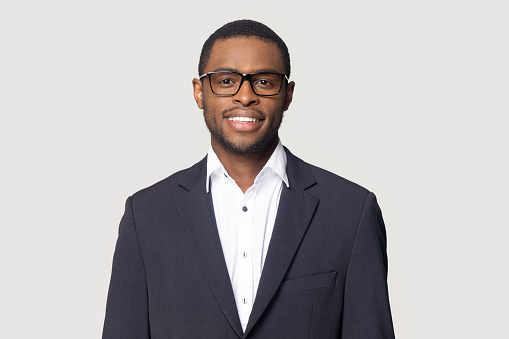



The person is not wearing a mask.

1/1 [==============================] - 0s 20ms/step


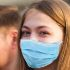



The person is wearing a mask. 

1/1 [==============================] - 0s 18ms/step




The person is wearing a mask. 

1/1 [==============================] - 0s 19ms/step


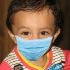



The person is wearing a mask. 

1/1 [==============================] - 0s 16ms/step




The person is not wearing a mask.

1/1 [==============================] - 0s 23ms/step


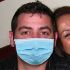



The person is wearing a mask. 

1/1 [==============================] - 0s 18ms/step


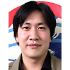



The person is not wearing a mask.

1/1 [==============================] - 0s 17ms/step


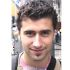



The person is not wearing a mask.

1/1 [==============================] - 0s 34ms/step


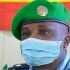



The person is wearing a mask. 

1/1 [==============================] - 0s 22ms/step


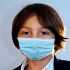



The person is wearing a mask. 



In [4]:
from IPython.display import Image, display
for i in range(1,12):
  img_directory = "imgTestMask/"+str(i)+".jpg"
  img_pred = image.load_img(img_directory, target_size = (70, 70))
  img_pred = image.img_to_array(img_pred)
  img_pred = np.expand_dims(img_pred, axis = 0)

  prediction = loadModel.predict(img_pred)
  display(Image(img_directory,width= 150, height=150))
  print("\n")
  if(int(prediction[0][0]) == 0):
   print( "The person is wearing a mask. \n")
  else:
   print("The person is not wearing a mask.\n")